# Get Athena++ 

using git:

## git clone https://github.com/PrincetonUniversity/athena.git

or download zip file from website:

## https://github.com/PrincetonUniversity/athena

# Required modules to run:

## python MPI and mpi enabled hdf5 library


Try the following in rusty:

### module purge
### module load gcc
### module load openmpi
### module load lib/hdf5


## check the loaded modules

module list

Currently Loaded Modules:
  1) modules/2.2-20230808 (S)   2) slurm (S)   3) openblas/threaded-0.3.23 (S)   4) gcc/11.4.0   5) openmpi/4.0.7   6) hdf5/mpi-1.10.9

# configurate the code for a specific problem
## python configure.py --prob=orszag_tang -b -mpi -hdf5 --coord=cartesian --flux=hlld --eos=adiabatic --nghost=3 

We will use the input file provided by the code, but change the output type from vtk to hdf5

## inputs/mhd/athinput.orszag-tang

cd bin

./athena -i ../inputs/mhd/athinput.orszag-tang output2/file_type=hdf5 mesh/nx1=512 mesh/nx2=512 meshblock/nx1=64 meshblock/nx2=64 -m 1

# we change the input file parameters, and check how many meshblocks in total using the coomand "-m 1"

# We can now run with 8 cores
mpirun -np 8 ./athena -i ../inputs/mhd/athinput.orszag-tang output2/file_type=hdf5 mesh/nx1=512 mesh/nx2=512 meshblock/nx1=64 meshblock/nx2=64

# visualize the data
# using vis/python/athena_read.py

In [17]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import sys
sys.settrace
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

import os
import glob
import h5py


In [2]:
import athena_read

In [3]:
files=sorted(glob.glob('./Data/*athdf'))

In [4]:
with h5py.File(files[-1], 'r') as f:
    level = f.attrs['MaxLevel']
    time = f.attrs['Time']
    data = athena_read.athdf(files[-1])

In [5]:
print(data.keys())

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Bcc1', 'Bcc2', 'Bcc3'])


In [9]:
x1v=data['x1v']
x2v=data['x2v']
rho=data['rho'][0,:,:]
Bcc1=data['Bcc1'][0,:,:]
Bcc2=data['Bcc2'][0,:,:]

In [10]:
PB=0.5*(Bcc1**2+Bcc2**2)

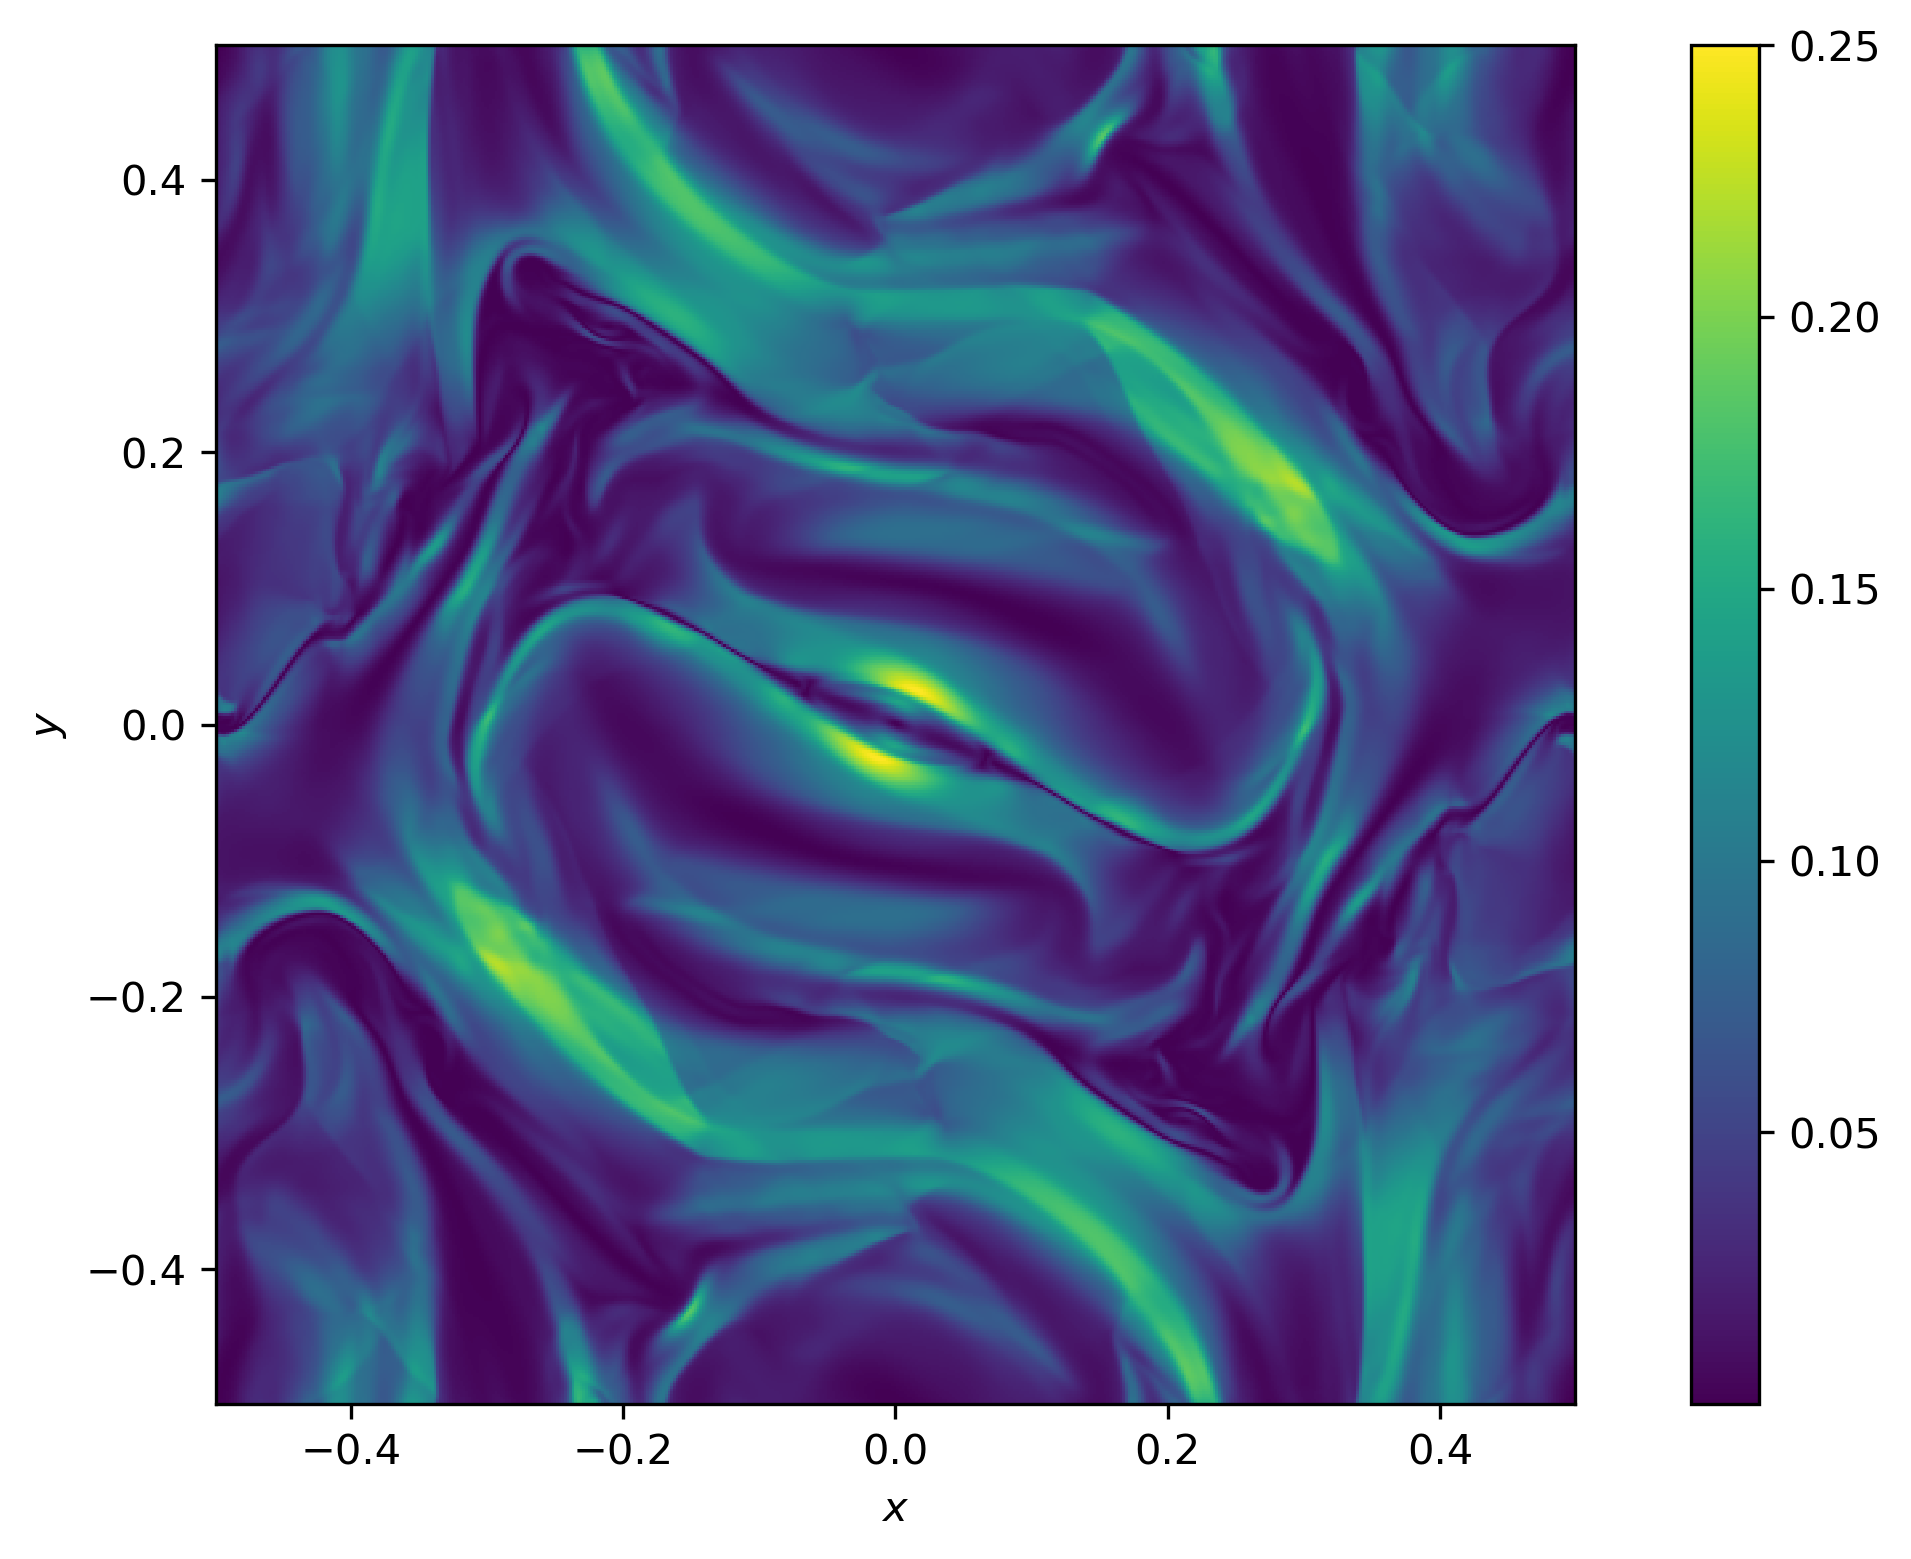

In [11]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(10,6),dpi=300)
im=axes.pcolormesh(x1v,x2v,PB,cmap='viridis')
axes.set_aspect('equal')
axes.set_xlabel(r'$x$',style='italic')
axes.set_ylabel(r'$y$',style='italic')
cbar=plots.colorbar(im, ax=axes)
#cbar.set_label(r'$\mathbf{\rho/\rho_0}$')
#plt.title(timelabel,fontweight='bold')
#plt.savefig(output_name1)

# Scripts included in the code can be also used:

## python plot_slice.py Data/OrszagTang.out2.00100.athdf rho ot_rho_100.png

# check out the documentation page for the radiation transport module in Athena++

https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport

# put the problem generator shadow_group.cpp in src/pgen, and athinput.shadow in inputs/radiation

configure the code as:

## python configure.py --prob=shadow_group -implicit_radiation -hdf5 -mpi

make clean

make -j

In [19]:
files=sorted(glob.glob('./Data/*athdf'))
with h5py.File(files[-1], 'r') as f:
    level = f.attrs['MaxLevel']
    time = f.attrs['Time']
    data = athena_read.athdf(files[-1])

In [20]:
print(data.keys())

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Er', 'Fr1', 'Fr2', 'Fr3', 'Pr11', 'Pr22', 'Pr33', 'Pr12', 'Pr13', 'Pr23', 'Pr21', 'Pr31', 'Pr32', 'Er0', 'Fr01', 'Fr02', 'Fr03', 'Sigma_s_0', 'Sigma_a_0', 'Sigma_p_0'])


In [55]:
x1v=data['x1v']
x2v=data['x2v']
Er=data['Er'][0,:,:]
rho=data['rho'][0,:,:]
pg=data['press'][0,:,:]
tgas=pg/rho

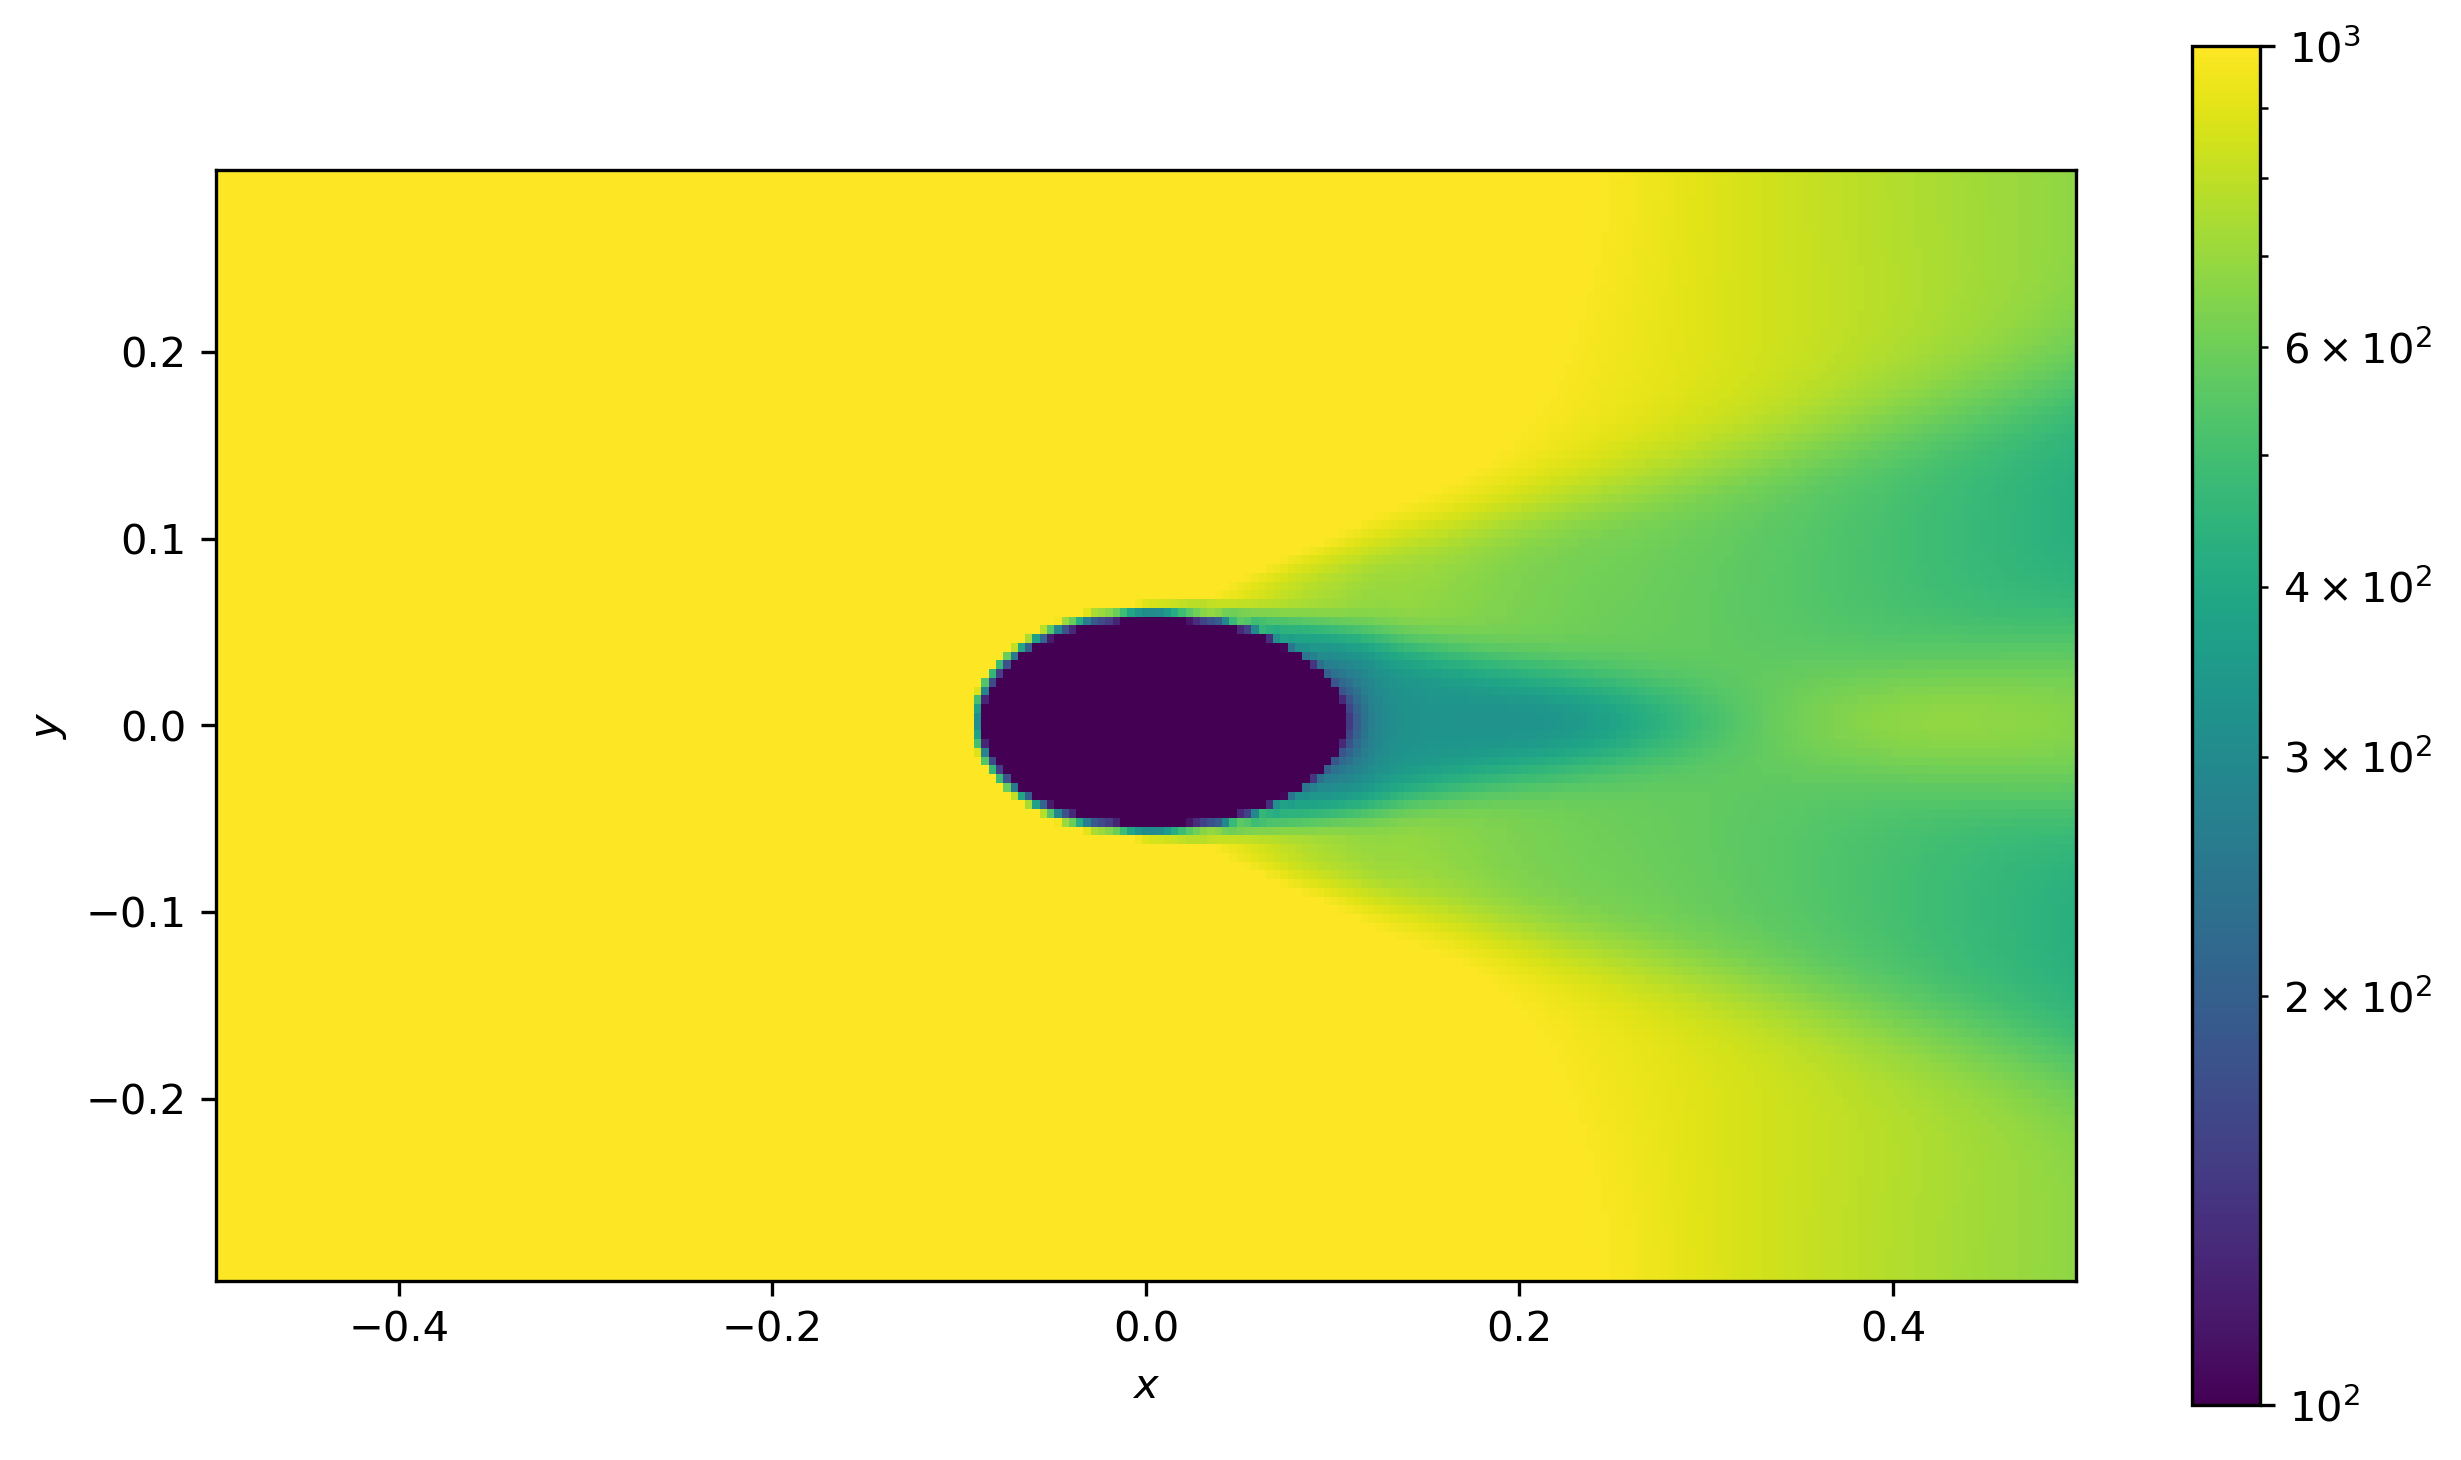

In [26]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(10,6),dpi=300)
im=axes.pcolormesh(x1v,x2v,Er,norm=LogNorm(vmin=100, vmax=1.e3),cmap='viridis')

axes.set_aspect('equal')
axes.set_xlabel(r'$x$',style='italic')
axes.set_ylabel(r'$y$',style='italic')
cbar=plots.colorbar(im, ax=axes)

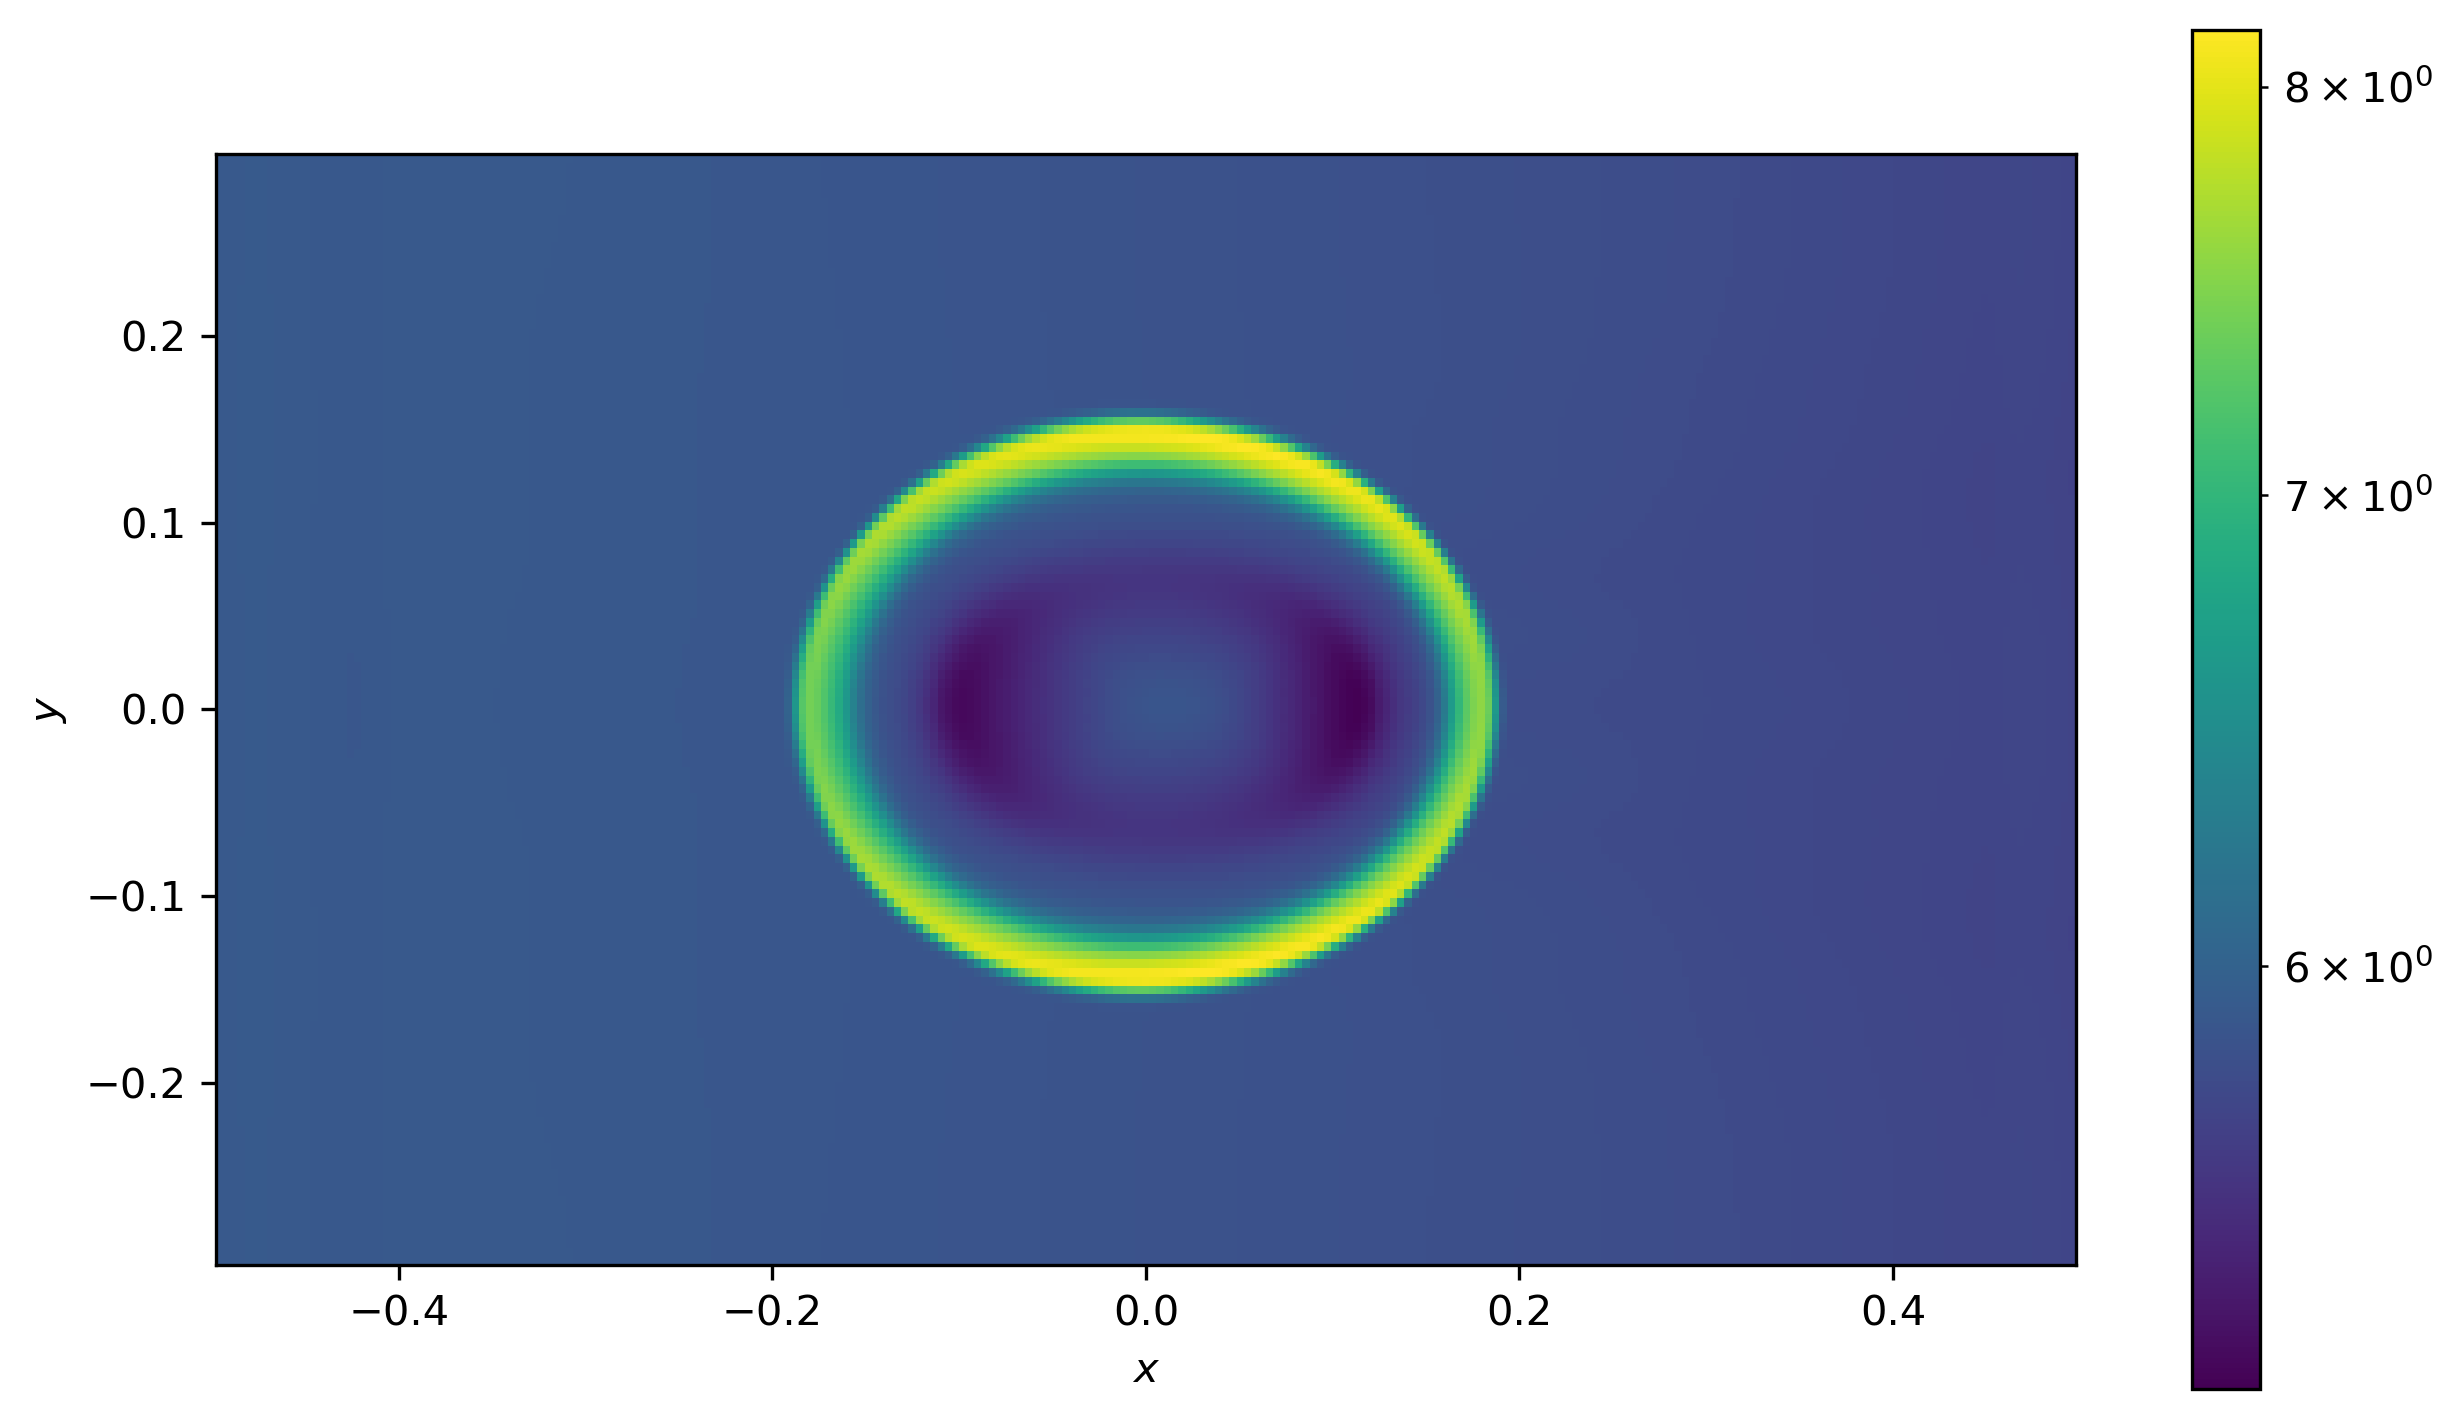

In [56]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(10,6),dpi=300)
im=axes.pcolormesh(x1v,x2v,tgas,norm=LogNorm(vmin=np.min(tgas), vmax=np.max(tgas)),cmap='viridis')

axes.set_aspect('equal')
axes.set_xlabel(r'$x$',style='italic')
axes.set_ylabel(r'$y$',style='italic')
cbar=plots.colorbar(im, ax=axes)

# use two frequency groups, set radiation/n_frequency=2

In [28]:
files=sorted(glob.glob('./Data/*athdf'))
with h5py.File(files[-1], 'r') as f:
    level = f.attrs['MaxLevel']
    time = f.attrs['Time']
    data = athena_read.athdf(files[-1])

In [29]:
print(data.keys())

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Er_0', 'Fr_0_1', 'Fr_0_2', 'Fr_0_3', 'Pr_0_11', 'Pr_0_22', 'Pr_0_33', 'Pr_0_12', 'Pr_0_13', 'Pr_0_23', 'Pr_0_21', 'Pr_0_31', 'Pr_0_32', 'Er0_0', 'Fr0_0_1', 'Fr0_0_2', 'Fr0_0_3', 'Er_1', 'Fr_1_1', 'Fr_1_2', 'Fr_1_3', 'Pr_1_11', 'Pr_1_22', 'Pr_1_33', 'Pr_1_12', 'Pr_1_13', 'Pr_1_23', 'Pr_1_21', 'Pr_1_31', 'Pr_1_32', 'Er0_1', 'Fr0_1_1', 'Fr0_1_2', 'Fr0_1_3', 'Sigma_s_0', 'Sigma_a_0', 'Sigma_p_0', 'Sigma_s_1', 'Sigma_a_1', 'Sigma_p_1'])


In [30]:
x1v=data['x1v']
x2v=data['x2v']
Er0=data['Er_0'][0,:,:]
Er1=data['Er_1'][0,:,:]
rho=data['rho'][0,:,:]

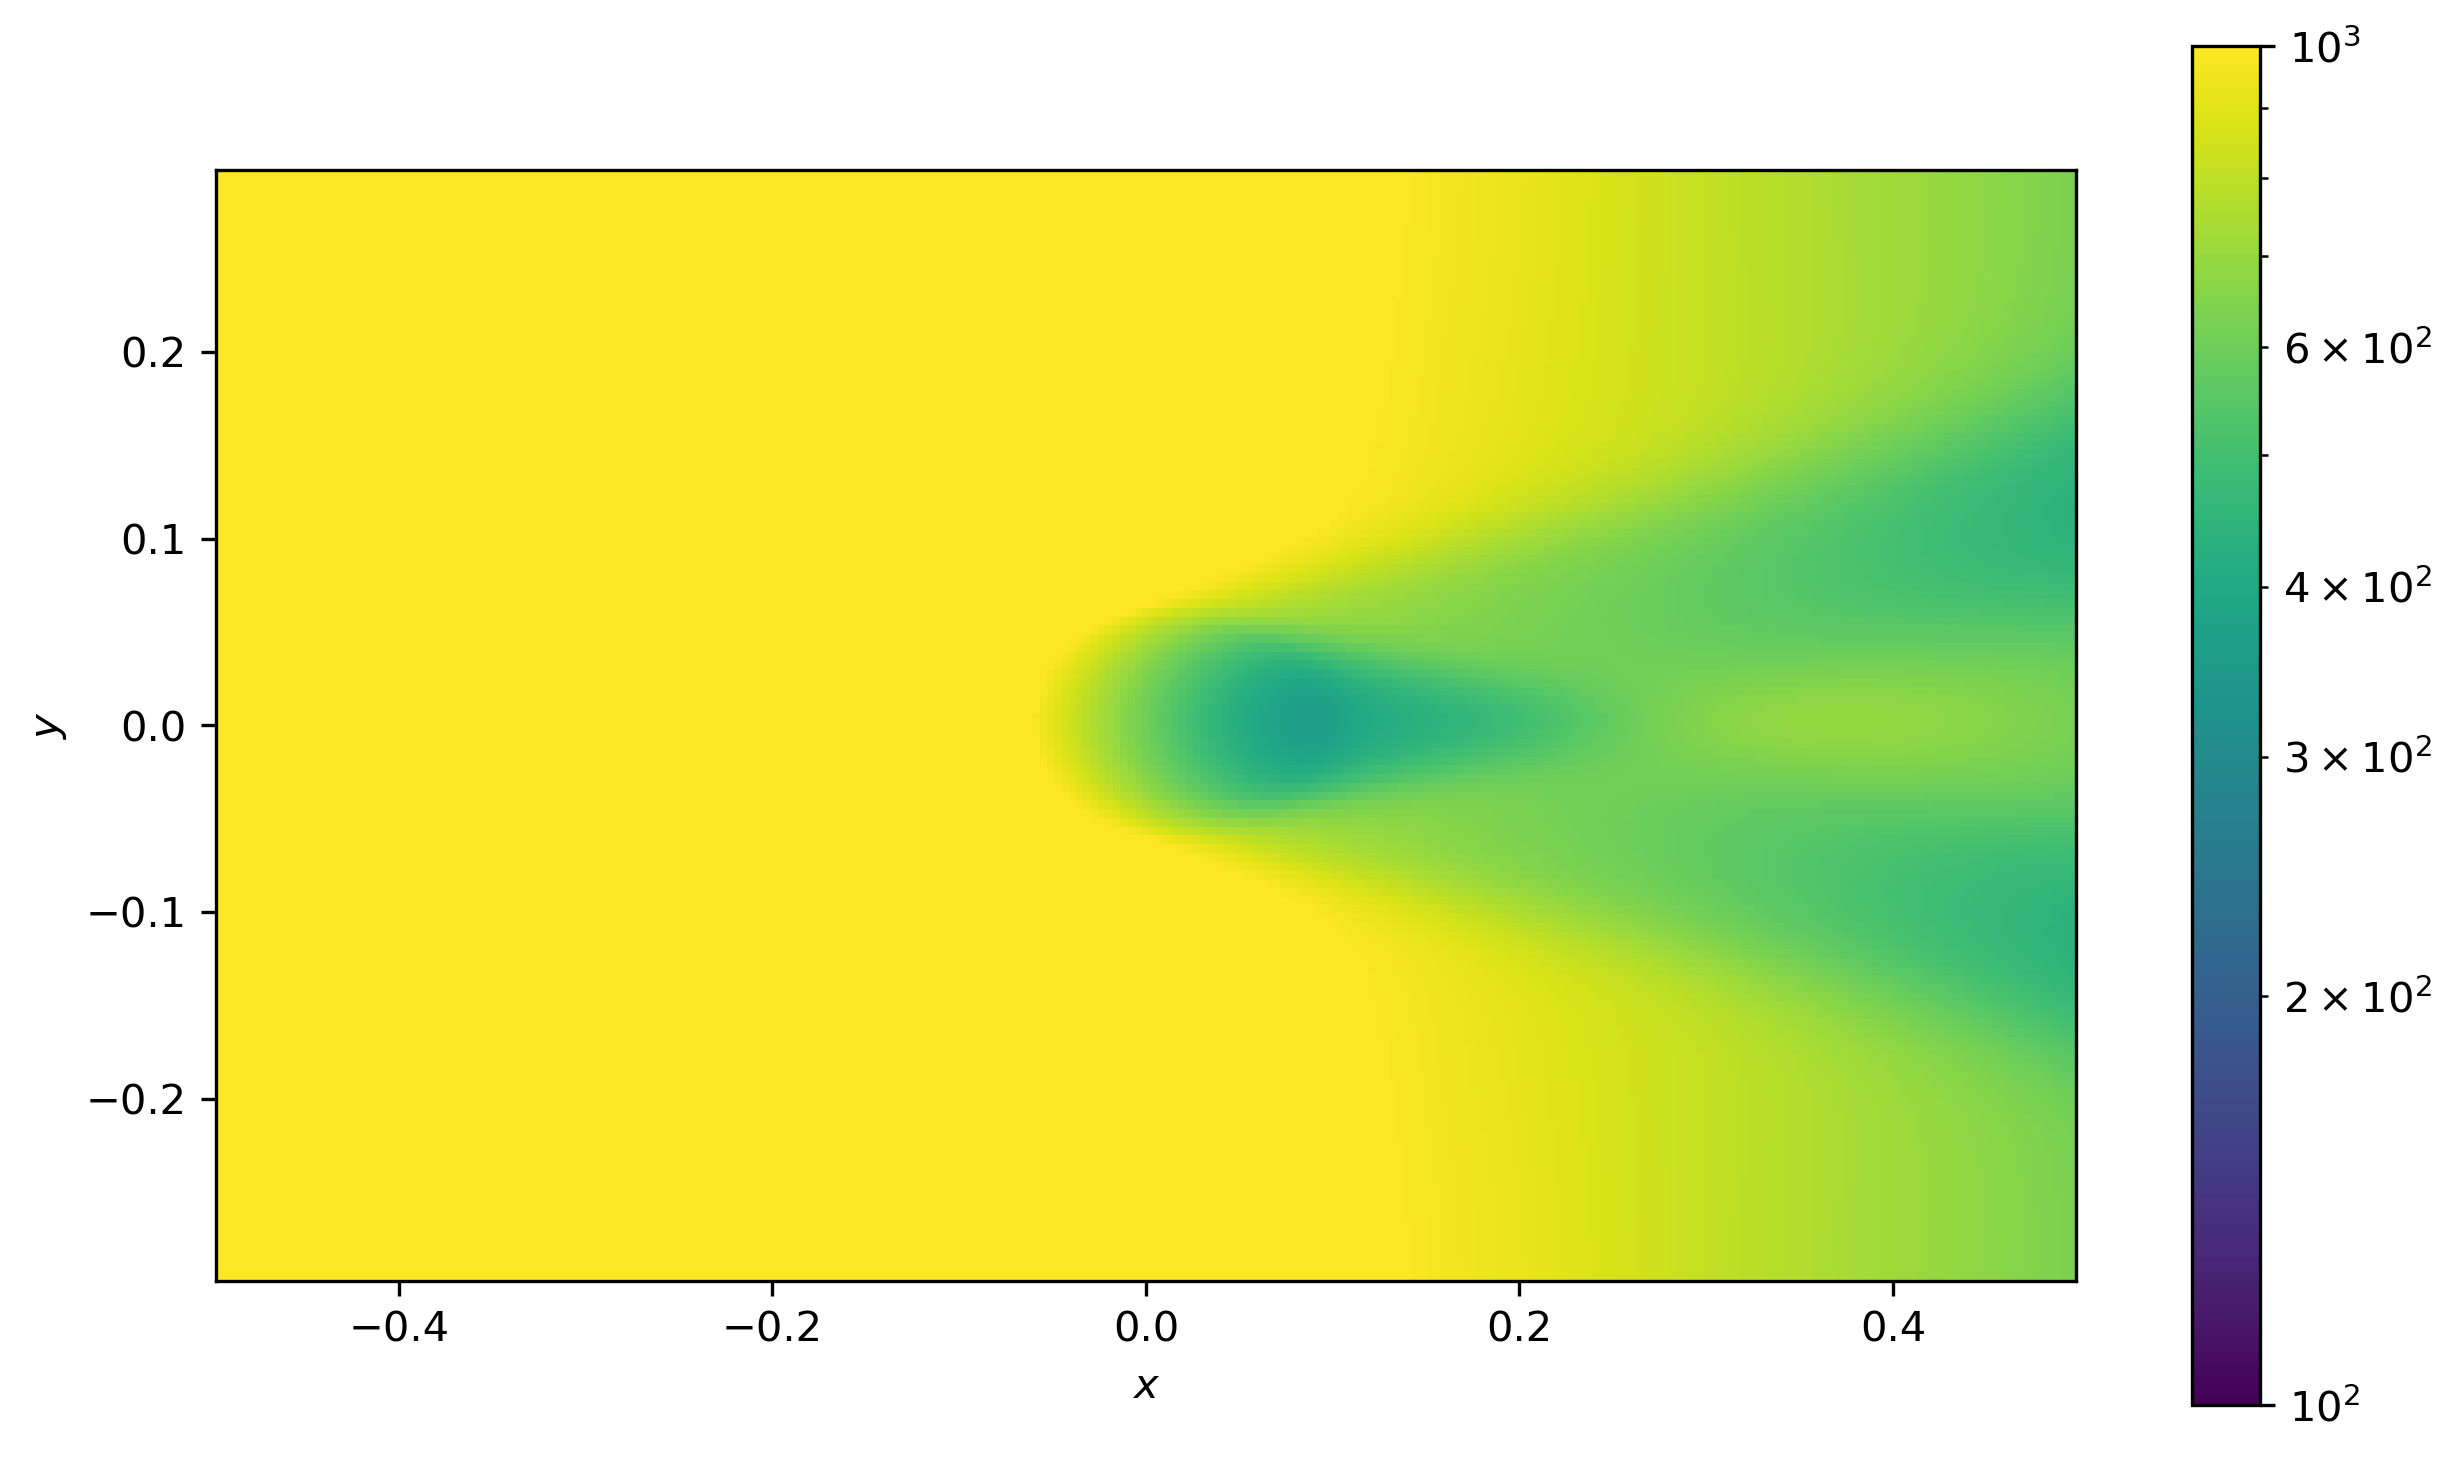

In [31]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(10,6),dpi=300)
im=axes.pcolormesh(x1v,x2v,Er1,norm=LogNorm(vmin=100, vmax=1.e3),cmap='viridis')

axes.set_aspect('equal')
axes.set_xlabel(r'$x$',style='italic')
axes.set_ylabel(r'$y$',style='italic')
cbar=plots.colorbar(im, ax=axes)

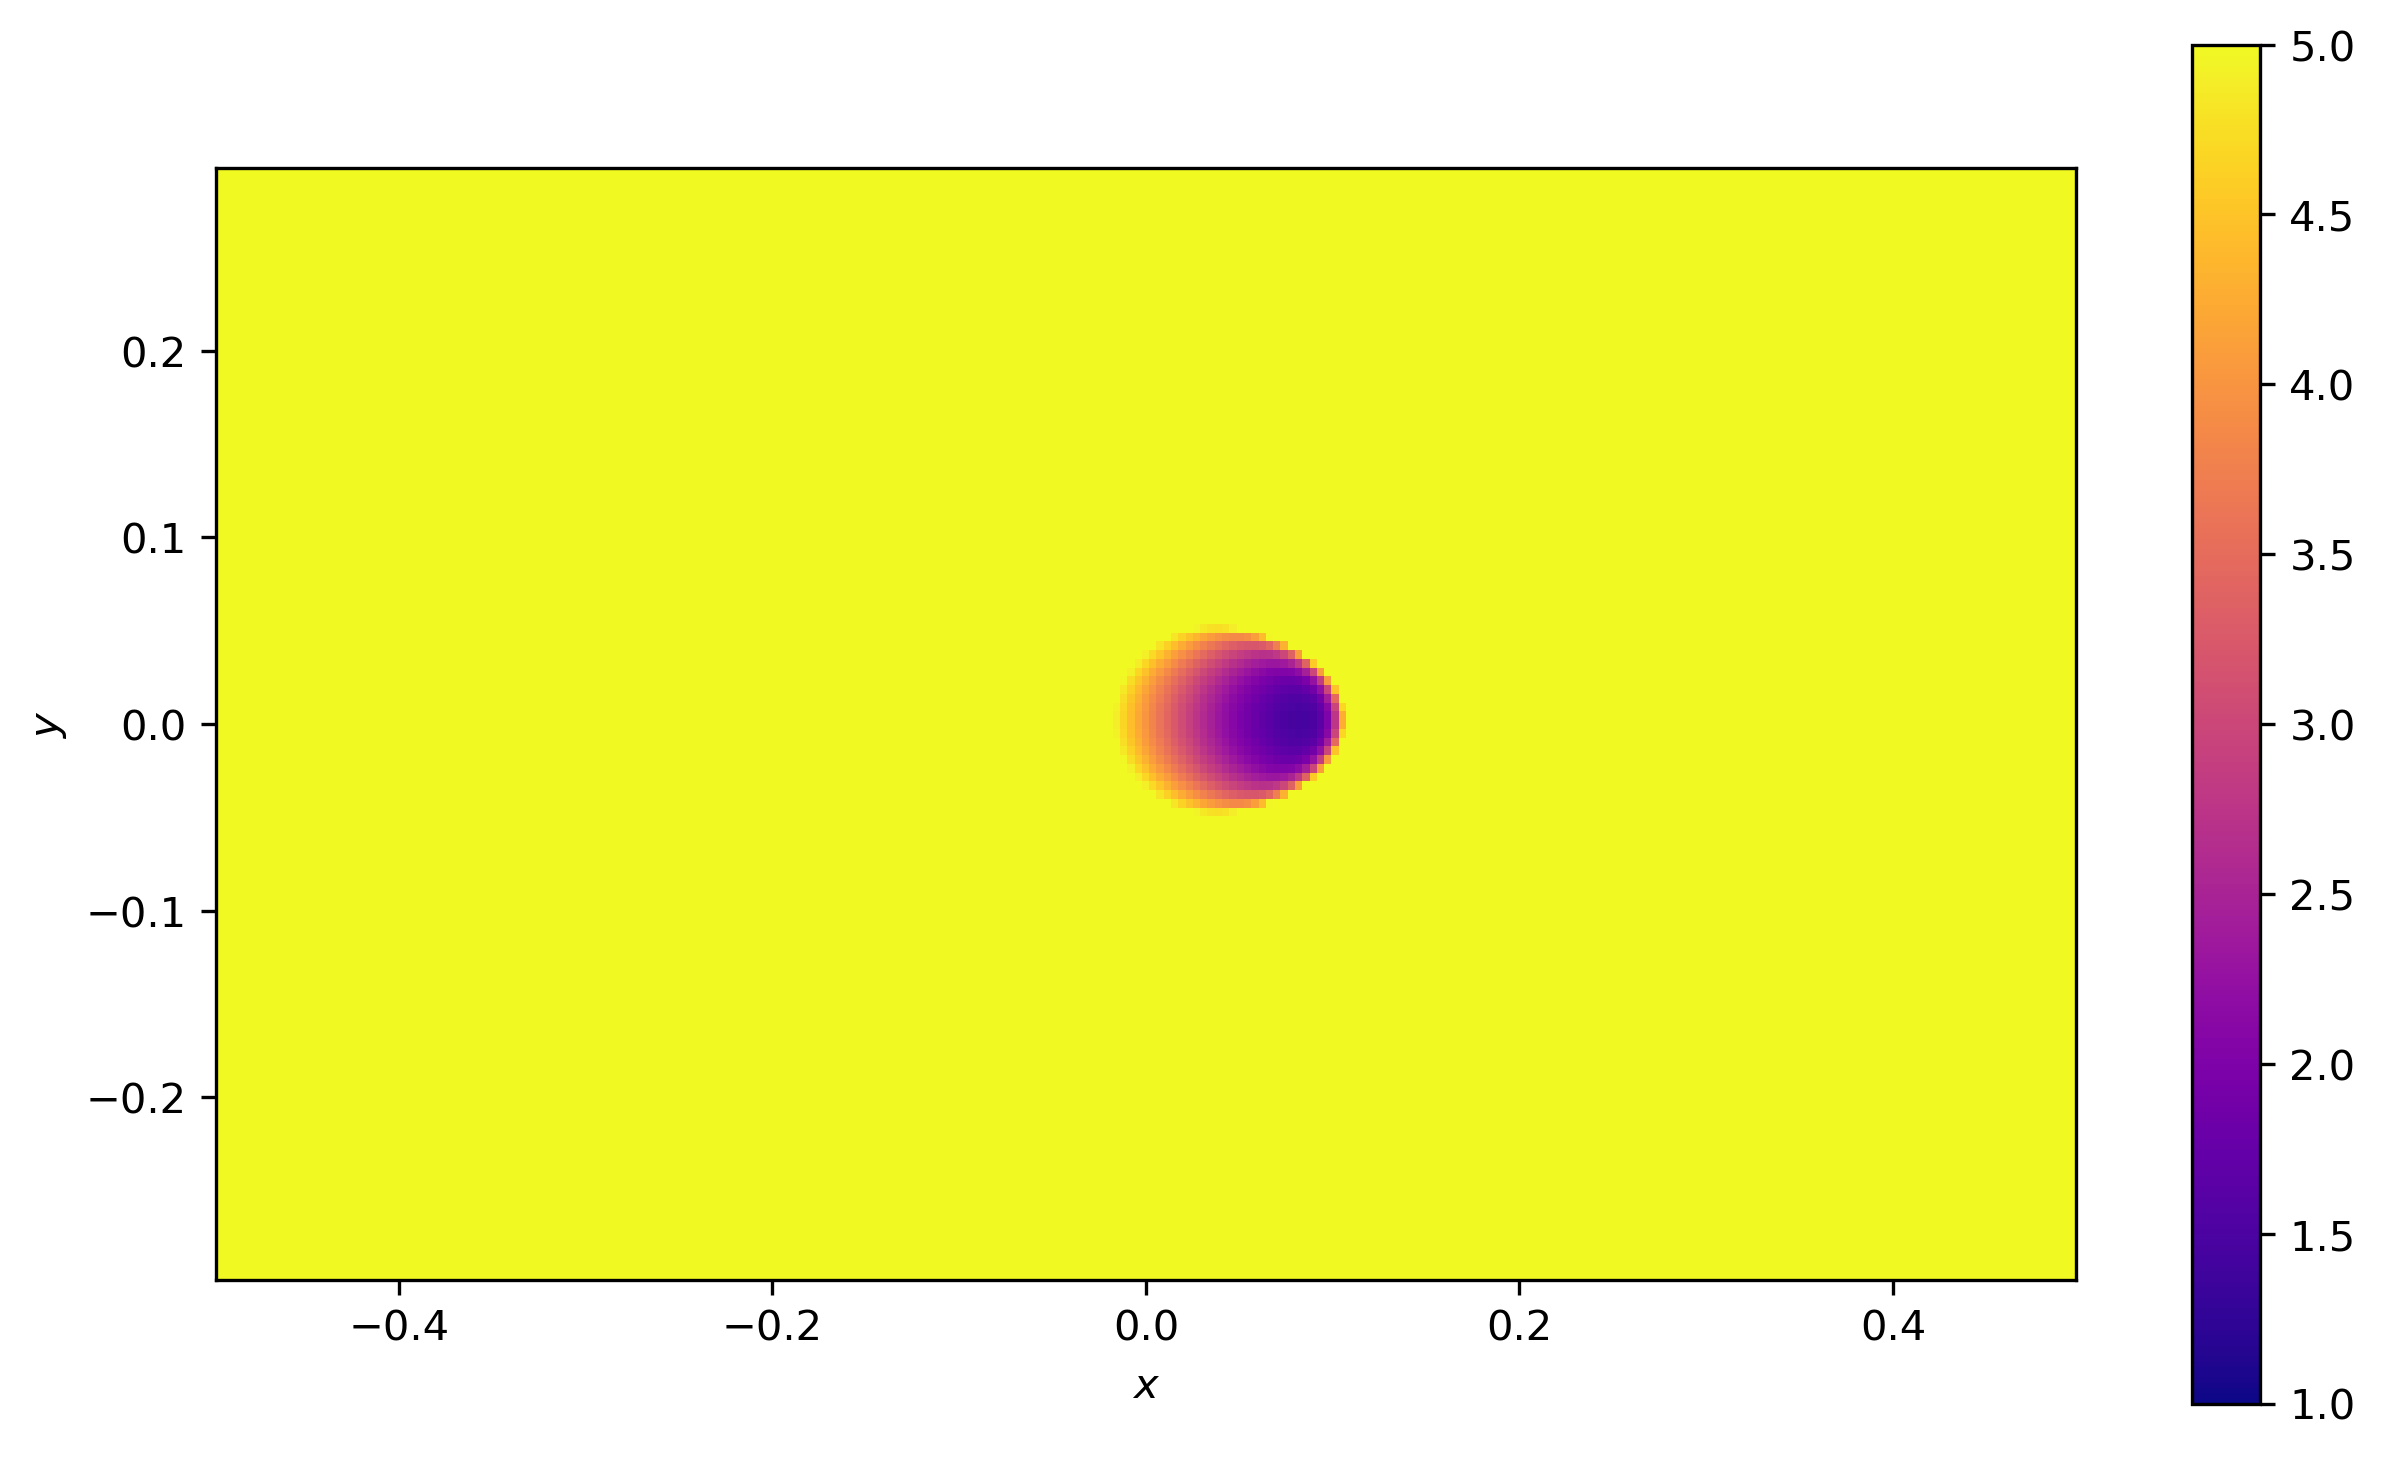

In [37]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(10,6),dpi=300)
#im=axes.pcolormesh(x1v,x2v,Er0,norm=LogNorm(vmin=0.1, vmax=10),cmap='viridis')
im=axes.pcolormesh(x1v,x2v,Er0,vmin=1,vmax=5,cmap='plasma')
axes.set_aspect('equal')
axes.set_xlabel(r'$x$',style='italic')
axes.set_ylabel(r'$y$',style='italic')
cbar=plots.colorbar(im, ax=axes)

# turn on the coupling between radiation and gas
# change the input files radiation/source_flag=1 problem/reset=0

In [57]:
files=sorted(glob.glob('./Data/*athdf'))
with h5py.File(files[0], 'r') as f:
    level = f.attrs['MaxLevel']
    time = f.attrs['Time']
    data = athena_read.athdf(files[0])

In [58]:
print(data.keys())

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Er', 'Fr1', 'Fr2', 'Fr3', 'Pr11', 'Pr22', 'Pr33', 'Pr12', 'Pr13', 'Pr23', 'Pr21', 'Pr31', 'Pr32', 'Er0', 'Fr01', 'Fr02', 'Fr03', 'Sigma_s_0', 'Sigma_a_0', 'Sigma_p_0'])


In [59]:
x1v=data['x1v']
x2v=data['x2v']
Er=data['Er'][0,:,:]
pg=data['press'][0,:,:]
rho=data['rho'][0,:,:]
tgas=pg/rho

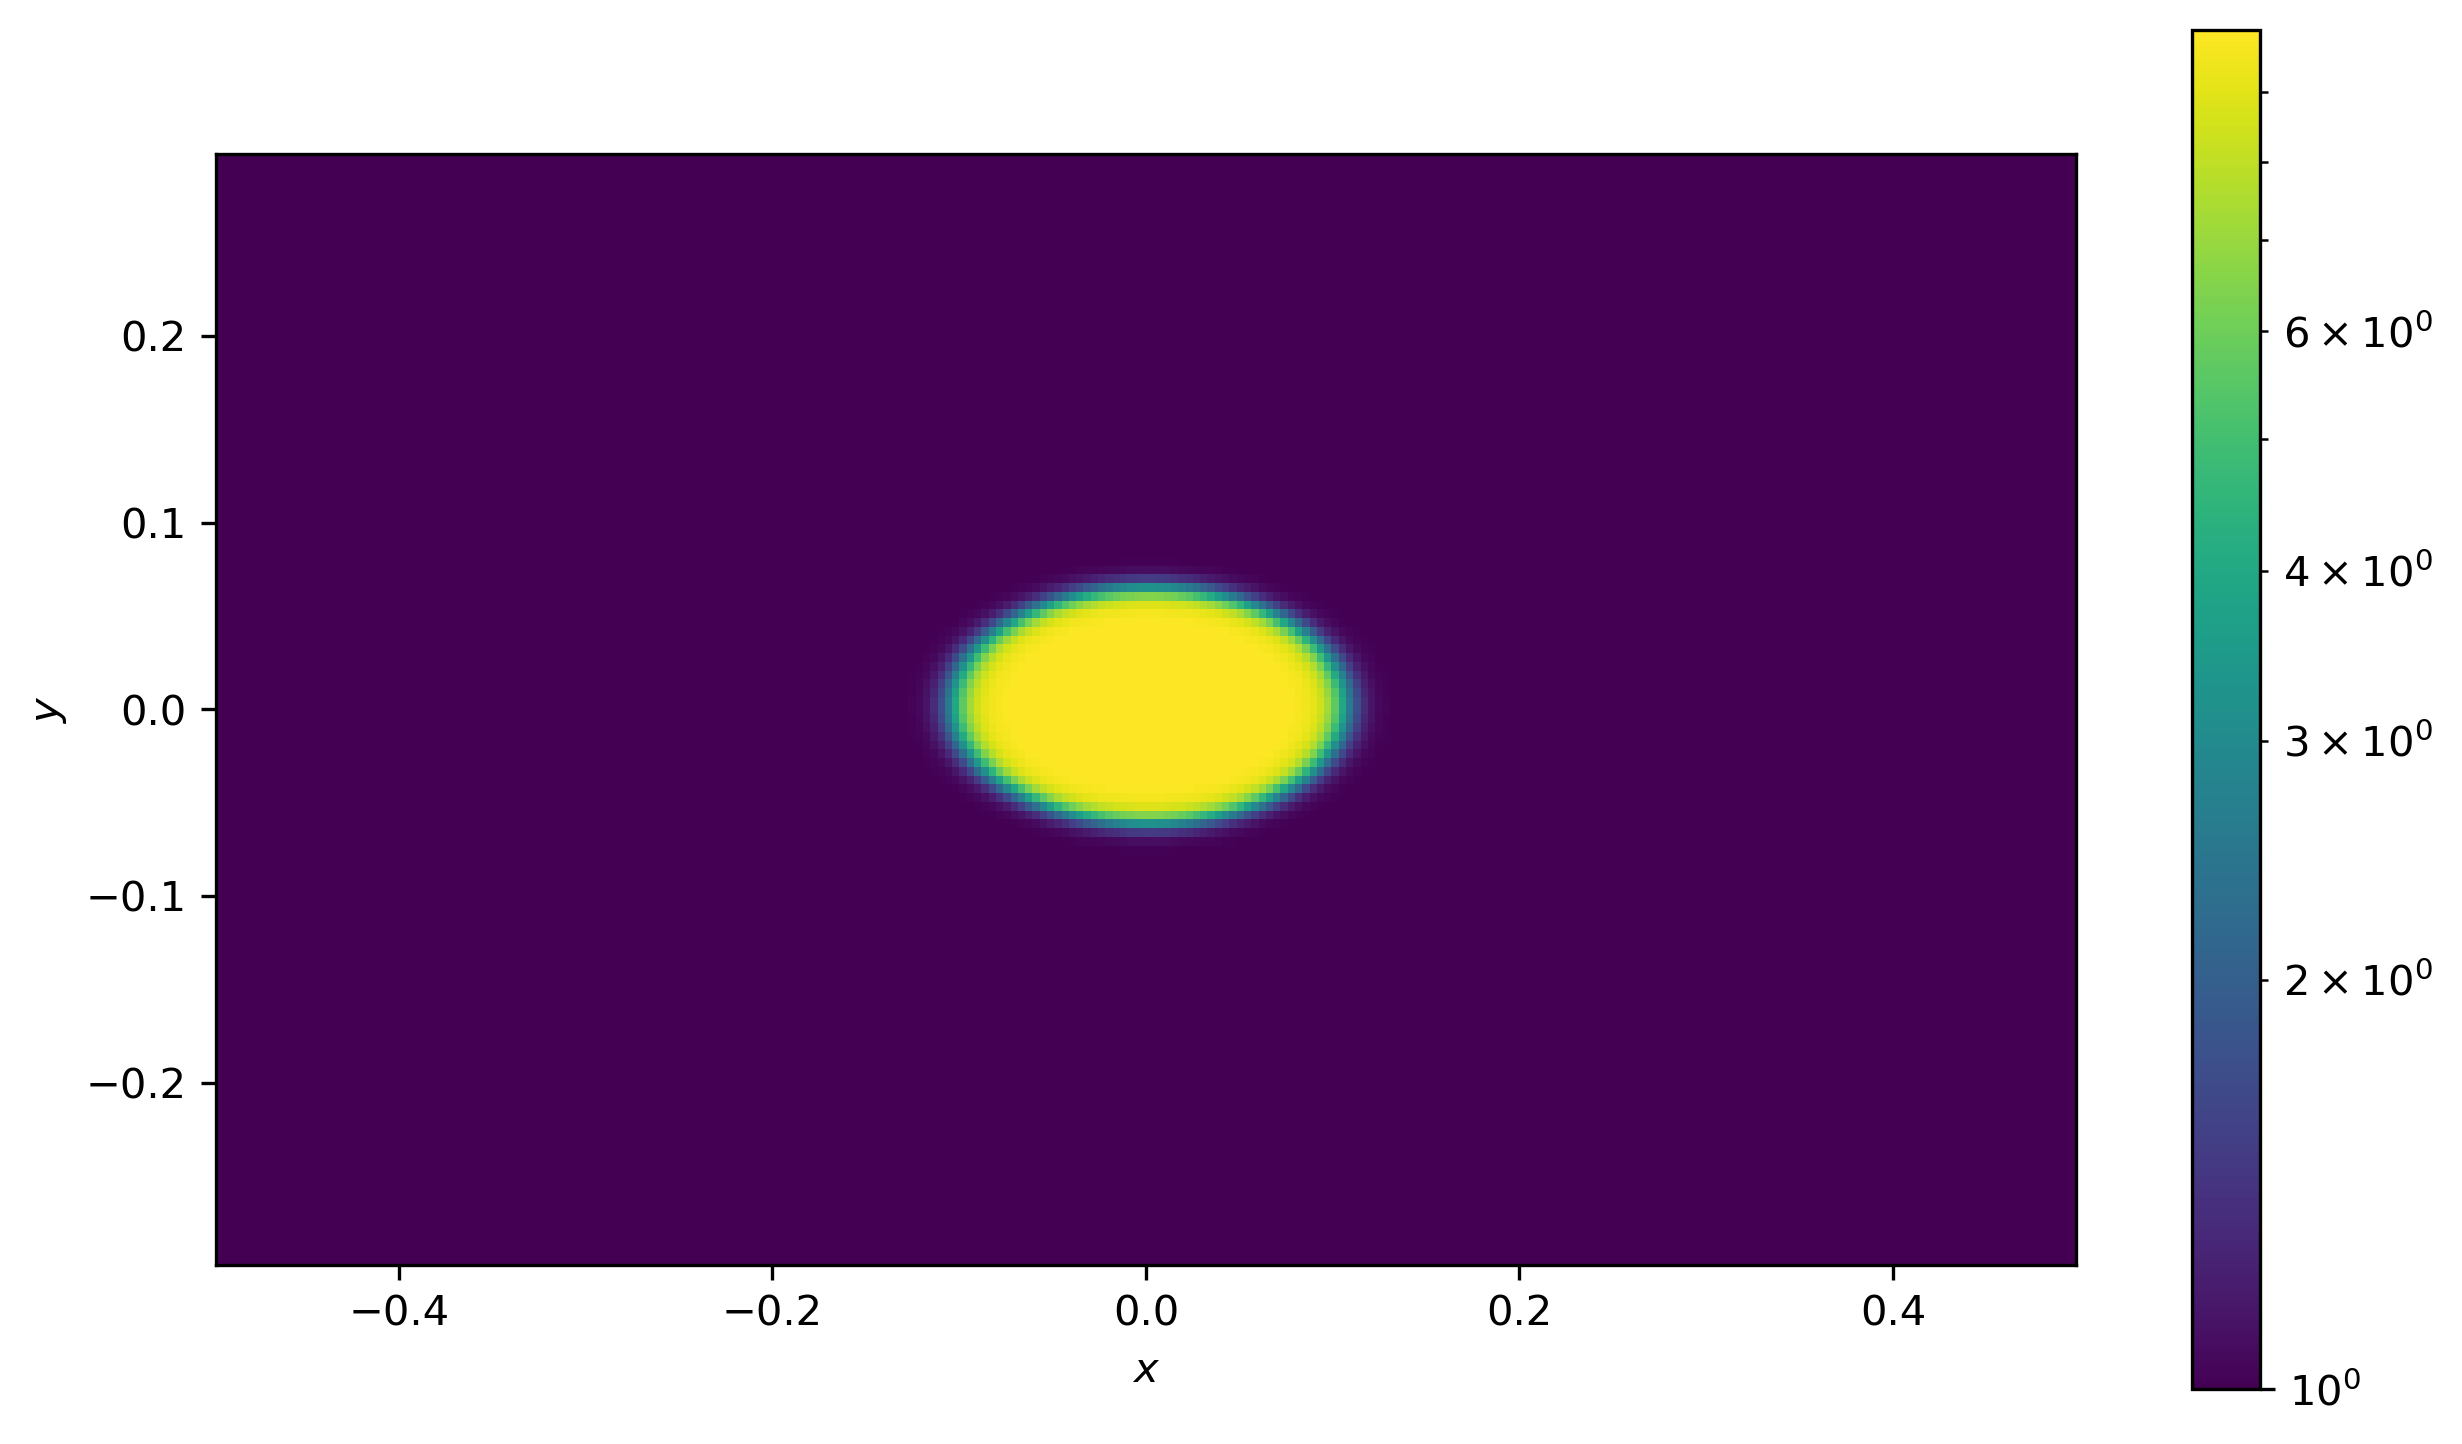

In [60]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(10,6),dpi=300)
im=axes.pcolormesh(x1v,x2v,rho,norm=LogNorm(vmin=np.min(rho), vmax=np.max(rho)),cmap='viridis')

axes.set_aspect('equal')
axes.set_xlabel(r'$x$',style='italic')
axes.set_ylabel(r'$y$',style='italic')
cbar=plots.colorbar(im, ax=axes)

In [61]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(10,6),dpi=300)
im=axes.pcolormesh(x1v,x2v,Er,norm=LogNorm(vmin=np.min(Er), vmax=np.max(Er)),cmap='viridis')

axes.set_aspect('equal')
axes.set_xlabel(r'$x$',style='italic')
axes.set_ylabel(r'$y$',style='italic')
cbar=plots.colorbar(im, ax=axes)

/mnt/home/yjiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
/mnt/home/yjiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  
/mnt/home/yjiang/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:307: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/mnt/home/yjiang/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:308: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]


ValueError: values must all be positive

<Figure size 3000x1800 with 2 Axes>

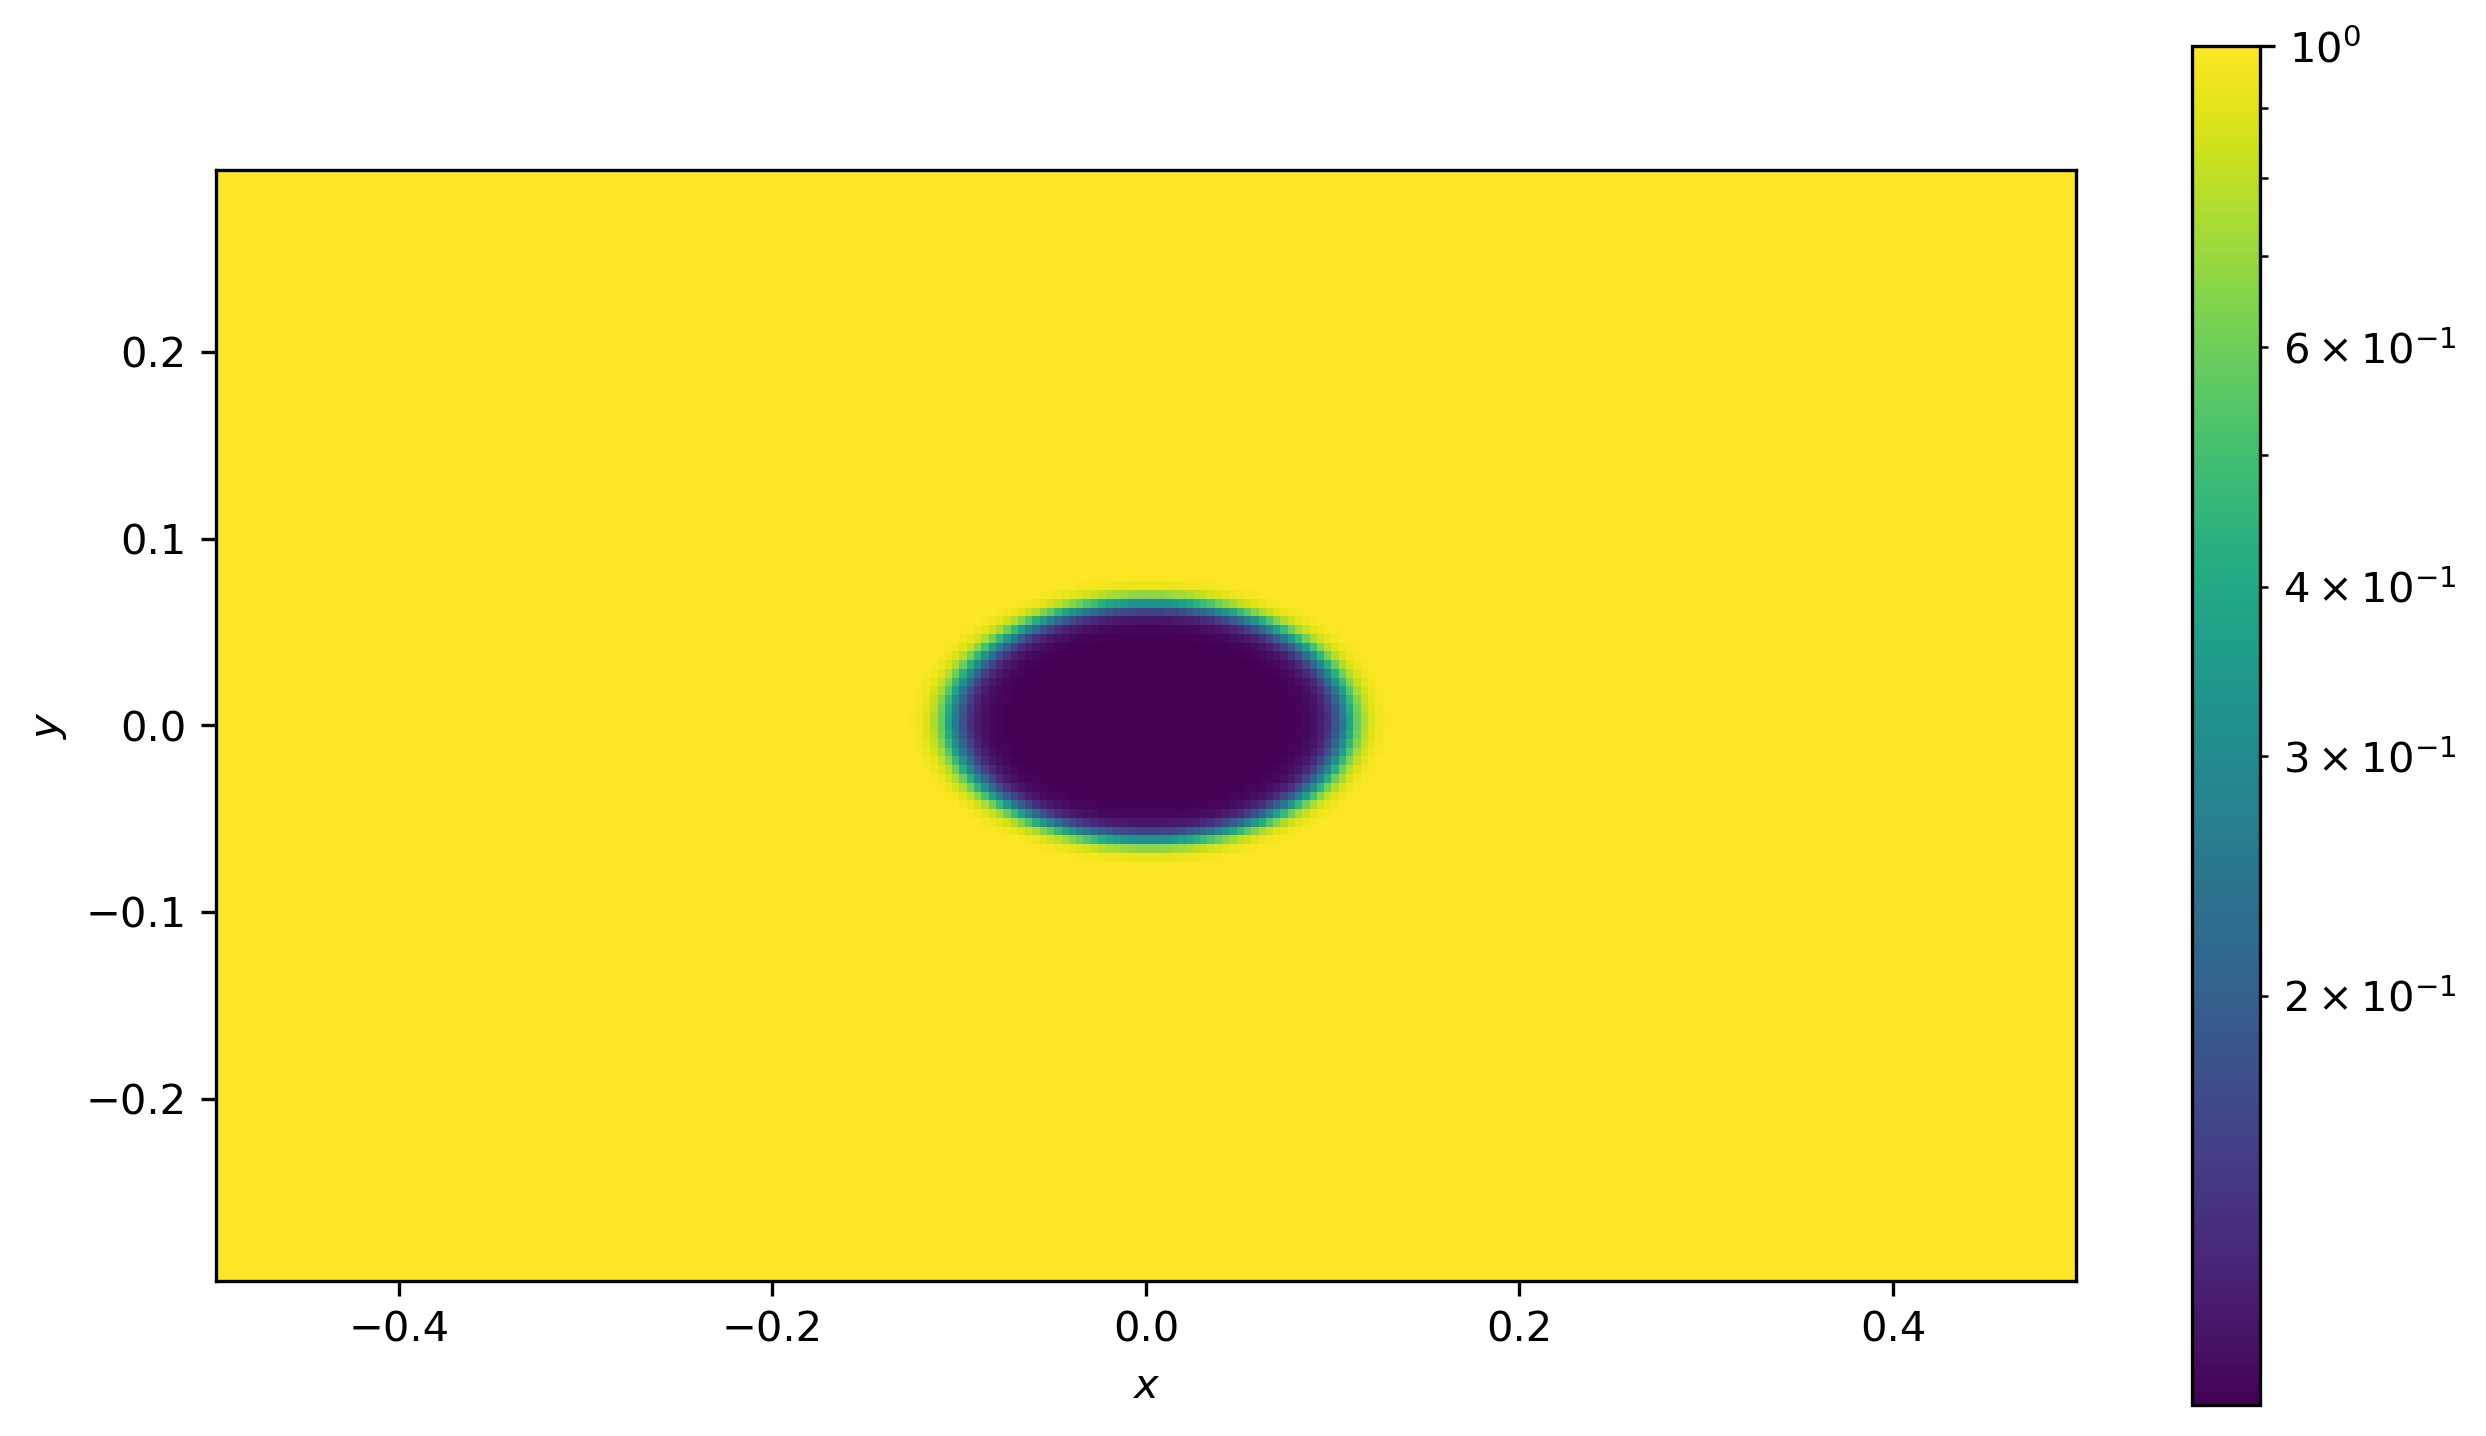

In [62]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(10,6),dpi=300)
im=axes.pcolormesh(x1v,x2v,tgas,norm=LogNorm(vmin=np.min(tgas), vmax=np.max(tgas)),cmap='viridis')

axes.set_aspect('equal')
axes.set_xlabel(r'$x$',style='italic')
axes.set_ylabel(r'$y$',style='italic')
cbar=plots.colorbar(im, ax=axes)